In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from my_library import *
import matplotlib.pyplot as plt

# Fonctions

In [236]:
def contains(clusters, id):
    for c in clusters:
        if id in c:
            return True
    return False


def remove_from_cluster(clusters, id):
    for i, c in enumerate(clusters):
        if id in c:
            c.remove(id)
            return i
    return -1


def euclidienne_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Plot clusters and centroids for each iteration

In [237]:
def plot_clusters(clusters, data, centeroids):
    # Set up the plot
    fig, ax = plt.subplots()
    # Plot each cluster
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']
    x0_vals = []
    y0_vals = []
    for i, cluster in enumerate(clusters):
        x_vals = [data[p][0] for p in cluster]
        y_vals = [data[p][1] for p in cluster]

        x0_vals.extend([data[p][0] for p in data if p not in cluster])
        y0_vals.extend([data[p][1] for p in data if p not in cluster])

        # Plot the points of clusters
        ax.scatter(x_vals, y_vals, color=colors[i % len(colors)], alpha=1, s=35, label=f"Cluster {i}")

        # Plot the centroids
        ax.scatter(centeroids[i][0], centeroids[i][1], marker='x', linewidth=1, color=colors[i % len(colors)], s=25,
                   alpha=1, label=f"Centroid {i}")
    # Plot the points not in clusters
    ax.scatter(x0_vals, y0_vals, color='gray', facecolors='none', alpha=1, s=50, label="Non Clustered")
    # Set the axis labels
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    # Show the plot
    plt.legend()

# K-means

In [238]:
def k_means(df: pd.DataFrame, k: int, centroids: list = None):
    id_s = df['id'].values
    data = {}
    for id in id_s:
        data[id] = []
    df.apply(lambda row: data[row['id']].extend(list(row[1:])), axis=1)

    clusters = []
    for _ in range(k):
        clusters.append([])

    if centroids is None:
        clusters = [[id] for id in id_s[:k]]
    change = True
    iteration = 0
    while change:
        change = False
        if centroids is None:
            centroids = list(list(np.mean([data[i] for i in c], axis=0)) for c in clusters)
        print("----------------------------------------------------------------------------------")
        print(f"-------------------------- iteration {iteration} --------------------------")
        iteration += 1
        print("centroids : ", centroids)
        print("clusters : ", clusters)
        for id in id_s:
            dists = []
            min_cluster = -1
            min_dist = np.inf
            for i in range(k):
                dist = euclidienne_distance(np.array(data[id]), np.array(centroids[i]))
                dists.append(dist)
                if dist < min_dist:
                    min_dist = dist
                    min_cluster = i
            print(f"------- {id} ---------")
            print(f"distance of {id} to each cluster : {dists}")
            if min_cluster != -1 and id not in clusters[min_cluster]:
                old_cluster = remove_from_cluster(clusters, id)
                clusters[min_cluster].append(id)
                change = True
                print(
                    f"change for {id}. new cluster : {min_cluster} (distance : {min_dist}) old cluster : {old_cluster}")
                plot_clusters(clusters, data, centroids)
            else:
                print(f"no change for {id}.")

        centroids = list(list(np.mean([data[i] for i in c], axis=0)) for c in clusters)

    return clusters, data


# Predict cluster for a new data

In [239]:
def predict_cluster(clusters, data, test_date: list):
    centroids = list(list(np.mean([data[i] for i in c], axis=0)) for c in clusters)
    dists = []
    min_cluster = -1
    min_dist = np.inf
    for i in range(k):
        dist = euclidienne_distance(np.array(test_date), np.array(centroids[i]))
        dists.append(dist)
        if dist < min_dist:
            min_dist = dist
            min_cluster = i
    return min_cluster, min_dist

# Test

----------------------------------------------------------------------------------
-------------------------- iteration 0 --------------------------
centroids :  [[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]]
clusters :  [['e1'], ['e2'], ['e3']]
------- e1 ---------
distance of e1 to each cluster : [0.0, 1.4142135623730951, 2.8284271247461903]
no change for e1.
------- e2 ---------
distance of e2 to each cluster : [1.4142135623730951, 0.0, 1.4142135623730951]
no change for e2.
------- e3 ---------
distance of e3 to each cluster : [2.8284271247461903, 1.4142135623730951, 0.0]
no change for e3.
------- e6 ---------
distance of e6 to each cluster : [7.0710678118654755, 5.656854249492381, 4.242640687119285]
change for e6. new cluster : 2 (distance : 4.242640687119285) old cluster : -1
------- e7 ---------
distance of e7 to each cluster : [8.48528137423857, 7.0710678118654755, 5.656854249492381]
change for e7. new cluster : 2 (distance : 5.656854249492381) old cluster : -1
------- e8 ---------
distan

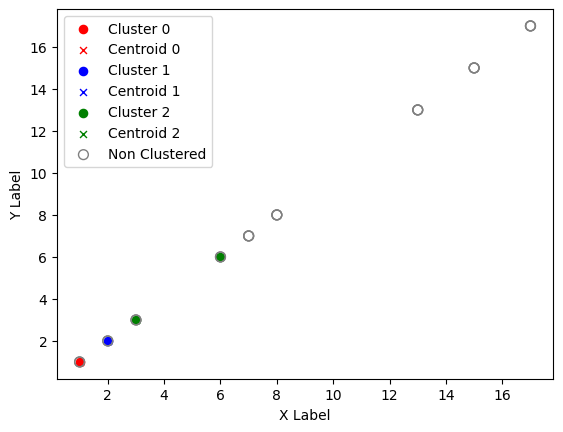

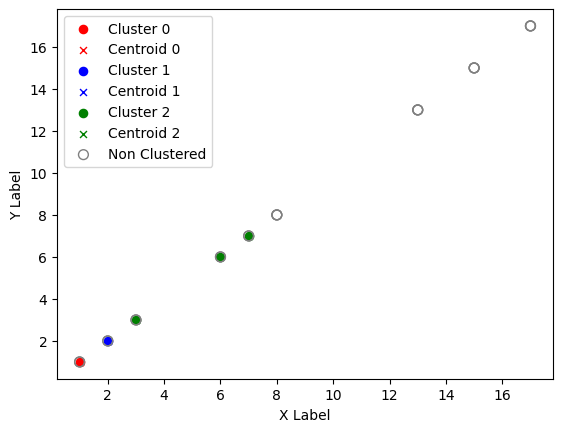

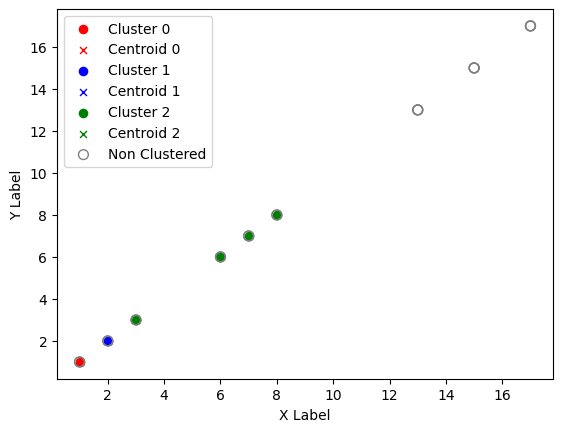

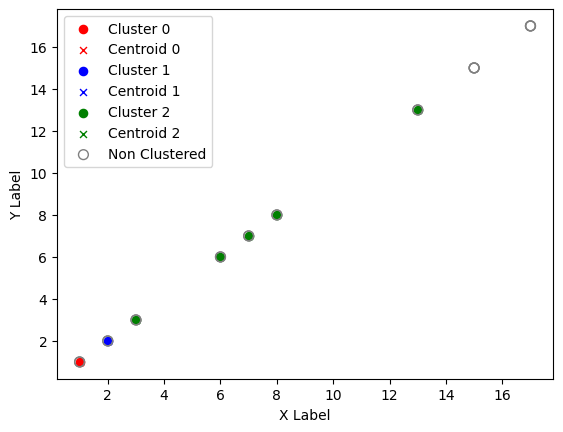

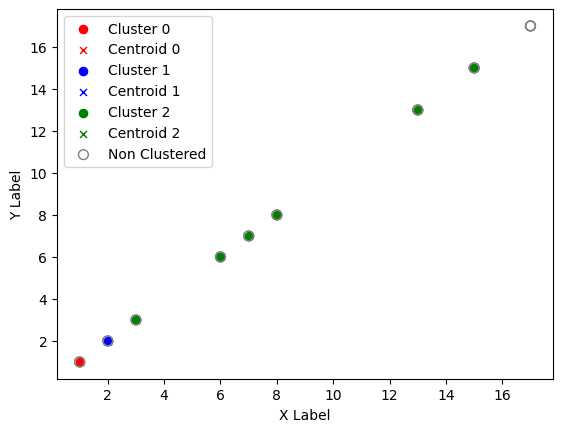

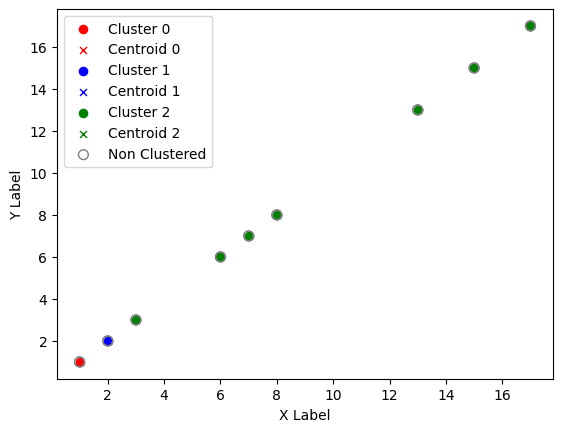

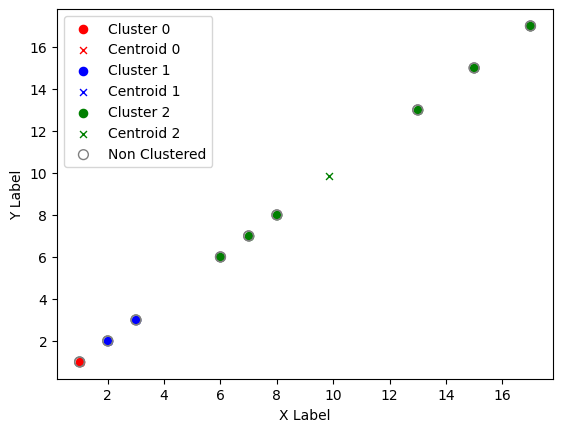

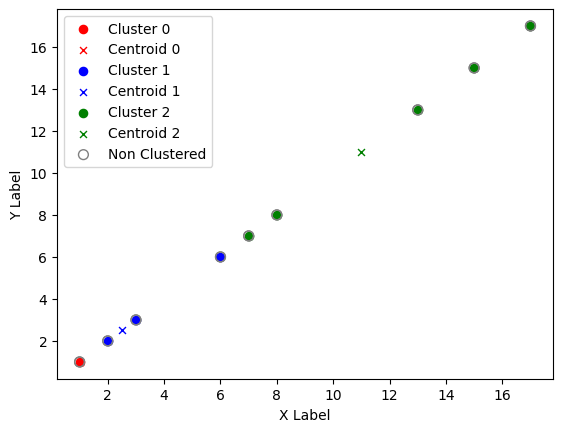

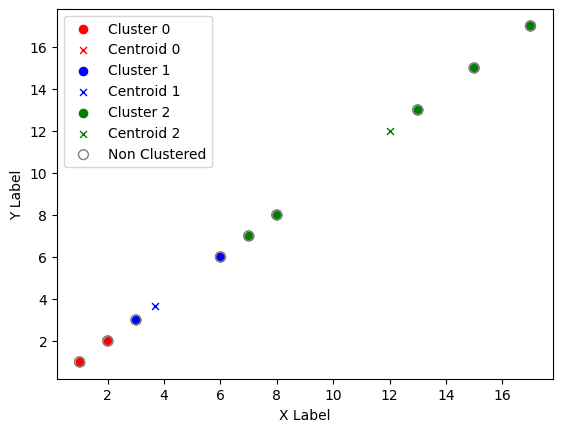

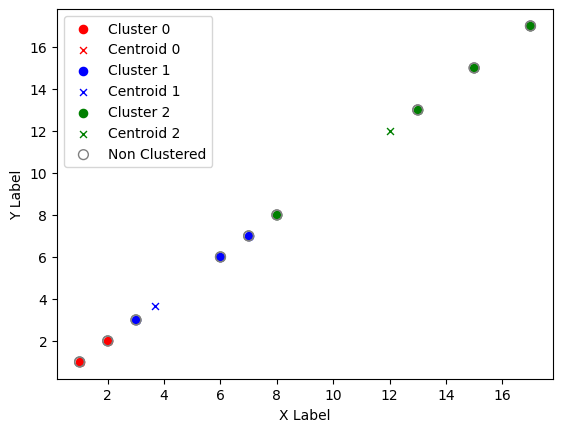

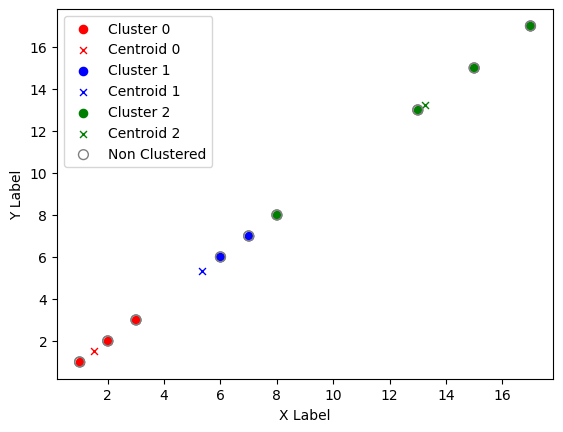

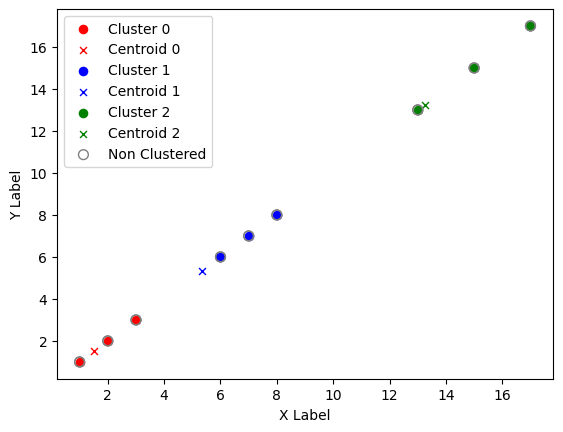

In [240]:
# Importing the dataset
# centroids, k, df = [[11, 13], [14, 18]], 2, pd.read_csv('exam-etuds.csv')
centroids, k, df = None, 3,pd.read_csv('etud.csv')

clusters, data = k_means(df, k, centroids=centroids)

# Test predict cluster for a new data

In [234]:
predict_cluster(clusters, data, [11, 13])

(2, 4.47213595499958)